In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score, auc


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Healthcare_Insurance.csv')

In [3]:
df.head(15)

,RID,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Label
0,3zhptpup,"2,00,000",60.0,male,64,24.3,NoDisease,1,0,Mumbay,72,0,0,Actor,13112.6,0
1,z0sfqbfr,"4,00,000",49.0,female,75,22.6,NoDisease,1,0,Bangalore,78,1,1,Engineer,9567.0,1
2,yi2l5bcu,"2,00,000",32.0,female,64,17.8,Epilepsy,2,1,Hydrabad,88,1,1,Academician,32734.2,0
3,y78y6b25,"4,00,000",61.0,female,53,36.4,NoDisease,1,1,Chennai,72,1,0,Chef,48517.6,1
4,vwthwjlm,"4,00,000",19.0,female,50,20.6,NoDisease,0,0,Kovai,82,1,0,HomeMakers,1731.7,0
5,w0m1wjsg,"4,00,000",42.0,female,89,37.9,NoDisease,0,0,Mangalore,78,0,0,Dancer,6474.0,0
6,a2he6tpj,"5,00,000",18.0,male,59,23.8,NoDisease,0,0,Nellore,64,0,0,Singer,1705.6,1
7,kao3q91w,"3,00,000",21.0,male,52,26.8,NoDisease,0,0,Secundarabad,74,1,0,Actor,1534.3,1
8,mksutjae,"2,00,000",63.0,male,55,NaN,NoDisease,0,0,Tiruvanandapuram,70,1,0,Dancer,13390.6,0
9,io8zi38v,"5,00,000",40.0,female,69,29.6,NoDisease,0,0,Salem,64,1,1,DataScientist,5910.9,0


In [4]:
print(sorted(Counter(df['Label']).items()))

[(0, 8421), (1, 6579)]


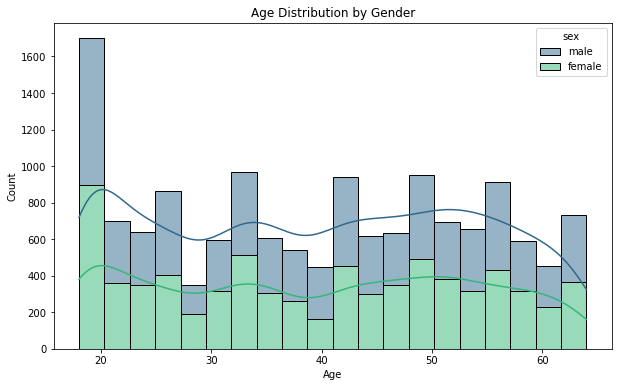

In [5]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, hue='sex', multiple='stack', palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

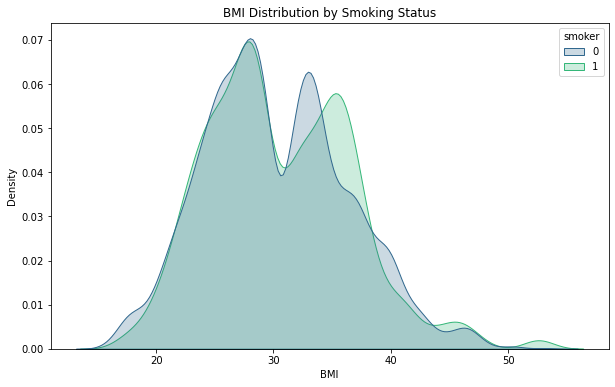

In [6]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True, common_norm=False, palette='viridis')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

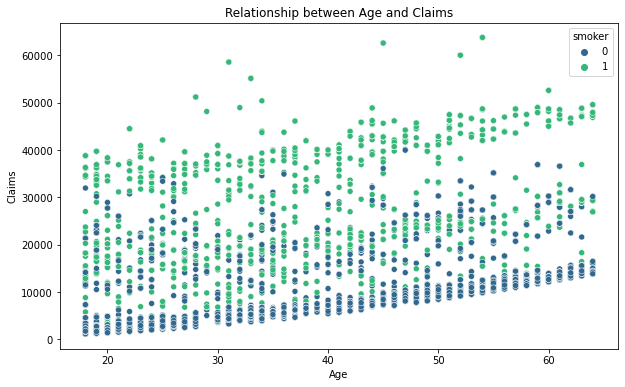

In [7]:
# Relationship between age and claims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', palette='viridis')
plt.title('Relationship between Age and Claims')
plt.xlabel('Age')
plt.ylabel('Claims')
plt.show()

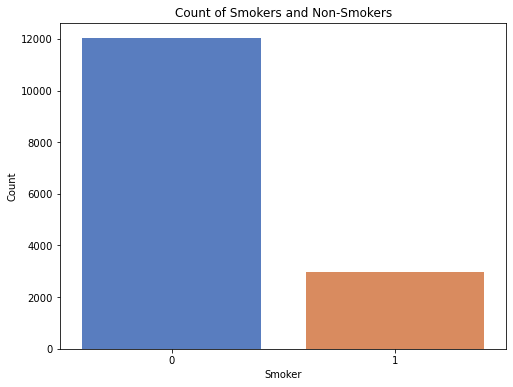

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', palette='muted')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

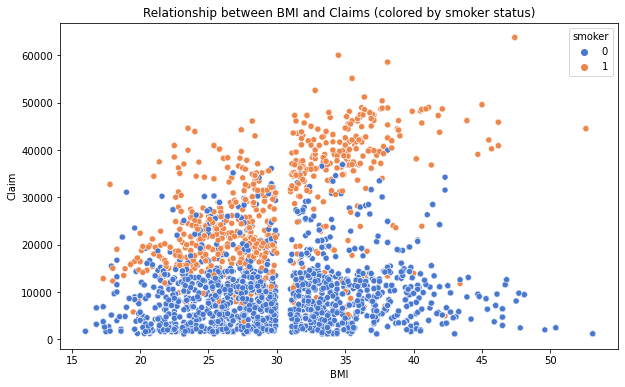

In [9]:
# Relationship between BMI and claims colored by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker', palette='muted')
plt.title('Relationship between BMI and Claims (colored by smoker status)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

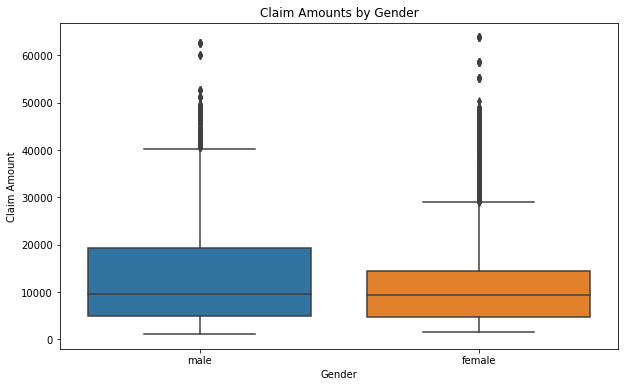

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='claim', data=df)
plt.title('Claim Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

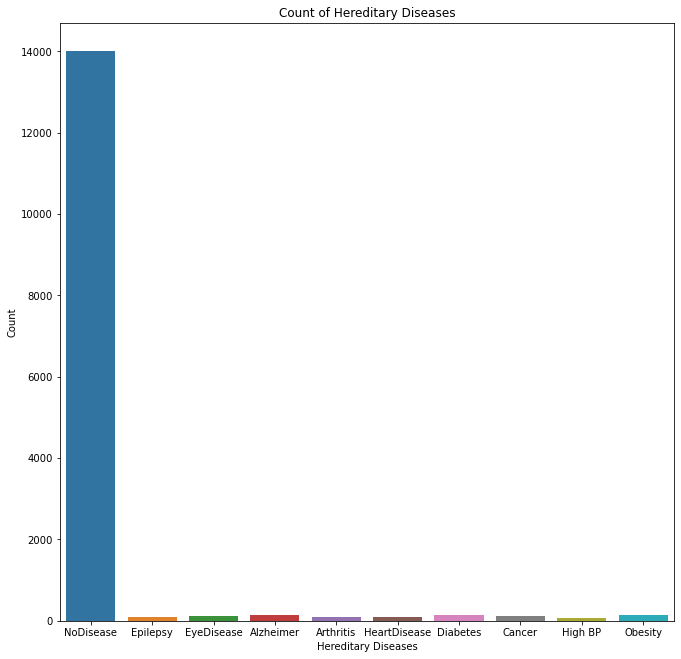

In [11]:
plt.figure(figsize=(11, 11))
sns.countplot(x='hereditary_diseases', data=df)
plt.title('Count of Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('Count')
plt.show()

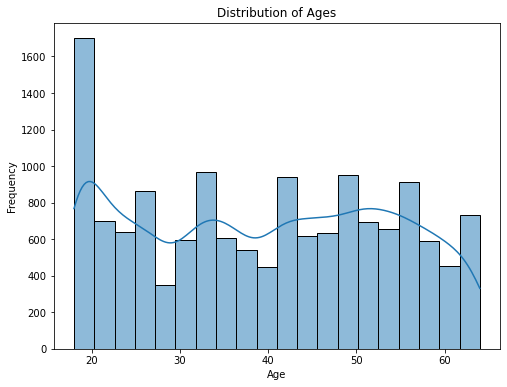

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

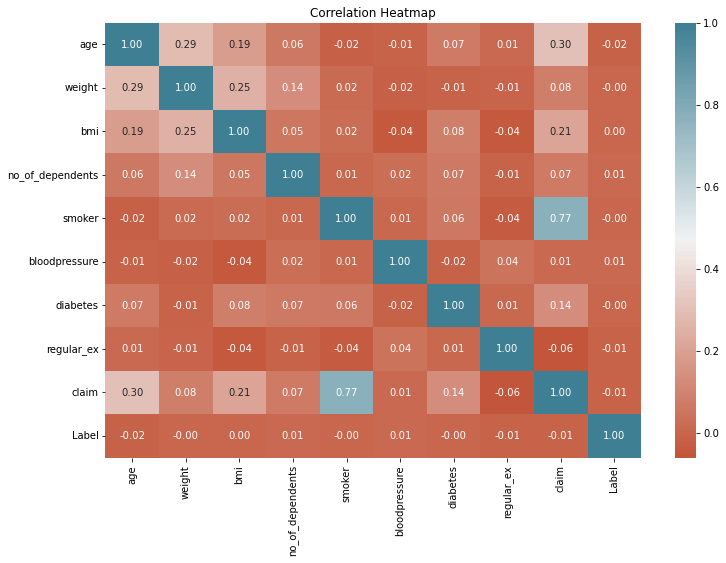

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

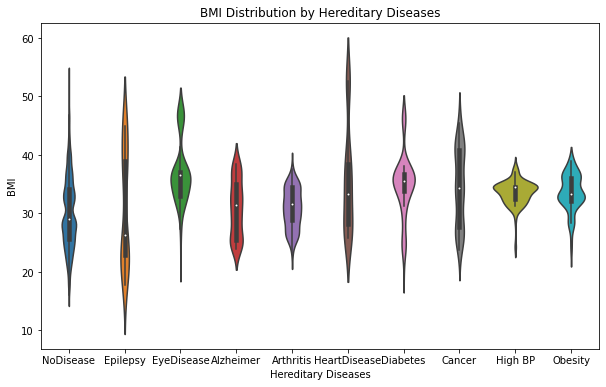

In [14]:
#Violinplot of BMI by Hereditary Diseases
plt.figure(figsize=(10, 6))
sns.violinplot(x='hereditary_diseases', y='bmi', data=df)
plt.title('BMI Distribution by Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('BMI')
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [16]:
df['Sum Insured'] = df['Sum Insured'].str.replace(',', '').astype(float)

In [17]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['hereditary_diseases'] = label_encoder.fit_transform(df['hereditary_diseases'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['city'] = label_encoder.fit_transform(df['city'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])

In [18]:
df.fillna(df.mean(), inplace=True)

C:\Users\nazari\AppData\Local\Temp\ipykernel_29208\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [19]:
X = df.drop(['RID', 'Label'], axis=1)
y = df['Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.55
Confusion Matrix:
[[1661    0]
 [1339    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1661
           1       0.00      0.00      0.00      1339

    accuracy                           0.55      3000
   macro avg       0.28      0.50      0.36      3000
weighted avg       0.31      0.55      0.39      3000



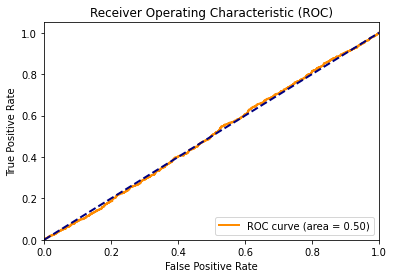

In [25]:
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [26]:
print("Thresholds:", thresholds)


Thresholds: [1.47128938 0.47128938 0.47128934 ... 0.37965948 0.37965941 0.37519663]


In [27]:
# Define a higher threshold value
custom_threshold = 0.44  # You can adjust this threshold as needed

# Convert predicted probabilities to binary predictions based on the custom threshold
y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)

# Compute performance metrics with the custom threshold
custom_threshold_accuracy = accuracy_score(y_test, y_pred_custom_threshold)
custom_threshold_conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)
custom_threshold_classification_rep = classification_report(y_test, y_pred_custom_threshold)

# Print the performance metrics
print(f"Accuracy with custom threshold ({custom_threshold}): {custom_threshold_accuracy:.2f}")
print("Confusion Matrix with custom threshold:")
print(custom_threshold_conf_matrix)
print("Classification Report with custom threshold:")
print(custom_threshold_classification_rep)


Accuracy with custom threshold (0.44): 0.50
Confusion Matrix with custom threshold:
[[800 861]
 [639 700]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1661
           1       0.45      0.52      0.48      1339

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.51      0.50      0.50      3000



In [28]:
# Define a lower threshold value
custom_threshold_lower = 0.44  # You can adjust this threshold as needed

# Convert predicted probabilities to binary predictions based on the lower threshold
y_pred_custom_threshold_lower = (y_pred_proba >= custom_threshold_lower).astype(int)

# Compute performance metrics with the lower threshold
custom_threshold_lower_accuracy = accuracy_score(y_test, y_pred_custom_threshold_lower)
custom_threshold_lower_conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold_lower)
custom_threshold_lower_classification_rep = classification_report(y_test, y_pred_custom_threshold_lower)

# Print the performance metrics
print(f"Accuracy with custom threshold ({custom_threshold_lower}): {custom_threshold_lower_accuracy:.2f}")
print("Confusion Matrix with custom threshold:")
print(custom_threshold_lower_conf_matrix)
print("Classification Report with custom threshold:")
print(custom_threshold_lower_classification_rep)


Accuracy with custom threshold (0.44): 0.50
Confusion Matrix with custom threshold:
[[800 861]
 [639 700]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1661
           1       0.45      0.52      0.48      1339

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.51      0.50      0.50      3000



In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [32]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.52
Confusion Matrix:
[[1113  548]
 [ 899  440]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.61      1661
           1       0.45      0.33      0.38      1339

    accuracy                           0.52      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.51      0.52      0.50      3000



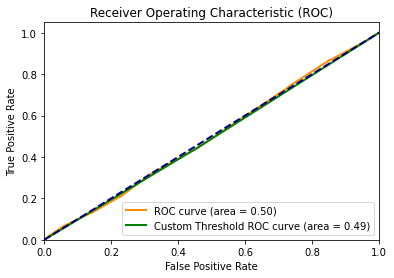

Confusion Matrix with custom threshold:
[[896 765]
 [740 599]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1661
           1       0.44      0.45      0.44      1339

    accuracy                           0.50      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.50      0.50      0.50      3000



In [33]:
# Compute predicted probabilities for class 1
y_pred_proba_rf = classifier.predict_proba(X_test)[:, 1]

# Define a custom threshold value
custom_threshold_rf = 0.44  # You can adjust this threshold as needed

# Convert predicted probabilities to binary predictions based on the custom threshold
y_pred_custom_threshold_rf = (y_pred_proba_rf >= custom_threshold_rf).astype(int)

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area with custom threshold
fpr_custom_rf, tpr_custom_rf, _ = roc_curve(y_test, y_pred_custom_threshold_rf)
roc_auc_custom_rf = auc(fpr_custom_rf, tpr_custom_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_custom_rf, tpr_custom_rf, color='green', lw=2, label=f'Custom Threshold ROC curve (area = %0.2f)' % roc_auc_custom_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
conf_matrix_custom_threshold_rf = confusion_matrix(y_test, y_pred_custom_threshold_rf)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_custom_threshold_rf)
classification_report_custom_threshold_rf = classification_report(y_test, y_pred_custom_threshold_rf)
print("Classification Report with custom threshold:")
print(classification_report_custom_threshold_rf)

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.55
Confusion Matrix:
[[1661    0]
 [1339    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1661
           1       0.00      0.00      0.00      1339

    accuracy                           0.55      3000
   macro avg       0.28      0.50      0.36      3000
weighted avg       0.31      0.55      0.39      3000



In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_proba_nb = classifier.predict_proba(X_test)[:, 1]
custom_threshold_nb = 0.45  # You can adjust this threshold as needed

y_pred_custom_threshold_nb = (y_pred_proba_nb >= custom_threshold_nb).astype(int)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_custom_nb, tpr_custom_nb, _ = roc_curve(y_test, y_pred_custom_threshold_nb)
roc_auc_custom_nb = auc(fpr_custom_nb, tpr_custom_nb)


ROC AUC without custom threshold: 0.502447979590653
ROC AUC with custom threshold: 0.4977482814234567


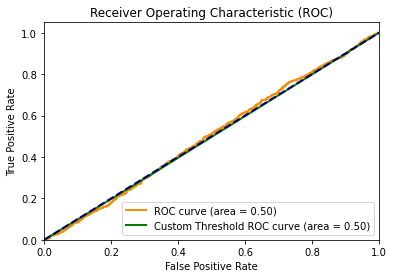

In [39]:
print("ROC AUC without custom threshold:", roc_auc_nb)
print("ROC AUC with custom threshold:", roc_auc_custom_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_custom_nb, tpr_custom_nb, color='green', lw=2, label=f'Custom Threshold ROC curve (area = %0.2f)' % roc_auc_custom_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Print confusion matrix with custom threshold
conf_matrix_custom_threshold_nb = confusion_matrix(y_test, y_pred_custom_threshold_nb)
print("Confusion Matrix with custom threshold:")
print(conf_matrix_custom_threshold_nb)

# Print classification report with custom threshold
classification_report_custom_threshold_nb = classification_report(y_test, y_pred_custom_threshold_nb)
print("Classification Report with custom threshold:")
print(classification_report_custom_threshold_nb)


Confusion Matrix with custom threshold:
[[1135  526]
 [ 921  418]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61      1661
           1       0.44      0.31      0.37      1339

    accuracy                           0.52      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.50      0.52      0.50      3000



In [41]:
X = df.drop(['RID', 'claim', 'Label'], axis=1)  # Dropping 'RID', 'claim', and 'Label' columns
y = df['claim']
from sklearn.linear_model import LinearRegression


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training set to demonstrate
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)


In [42]:
new_df = pd.DataFrame(X_train,index=[0])
new_df

,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,200000.0,60.0,1,64,24.3,8,1,0,62,72,0,0,2


In [43]:
new_pred = lr.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 11279.835615774318
